# LM-Fluency Analysis

### Load data

In [1]:
import pandas as pd

textcomplexity = pd.read_csv('../data/textcomplexityde.csv', encoding='cp1252')
leichtesprache = pd.read_csv('../data/leichtesprache2.csv', encoding='cp1252', sep=";")

## Fluency Score

In [6]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('..', '')))
from reward.fluency import Fluency

# Load the score
fluency = Fluency(model_file="../models/wiki_finetune.bin", device_idx=0)

Fluency model on cuda:0
<All keys matched successfully>


In [8]:
tc_scores = fluency.score(textcomplexity['Complex'], textcomplexity['Simplification'])
ls_scores = fluency.score(leichtesprache['Complex'], leichtesprache['Simplification'])

Token indices sequence length is longer than the specified maximum sequence length for this model (634 > 512). Running this sequence through the model will result in indexing errors


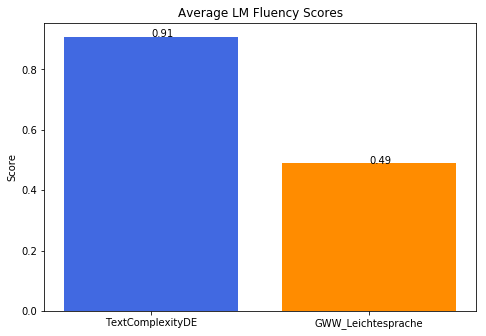

In [9]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
ax.bar(0, np.mean(tc_scores), color = 'royalblue', width = 0.8)
ax.bar(1, np.mean(ls_scores), color = 'darkorange', width = 0.8)
ax.set_ylabel('Score')
ax.set_title('Average LM Fluency Scores')
ax.set_xticks([0, 1])
ax.set_xticklabels(["TextComplexityDE", "GWW_Leichtesprache"])

plt.text(0, np.mean(tc_scores), "%.2f" % np.mean(tc_scores))
plt.text(1, np.mean(ls_scores), "%.2f" % np.mean(ls_scores))

plt.show()

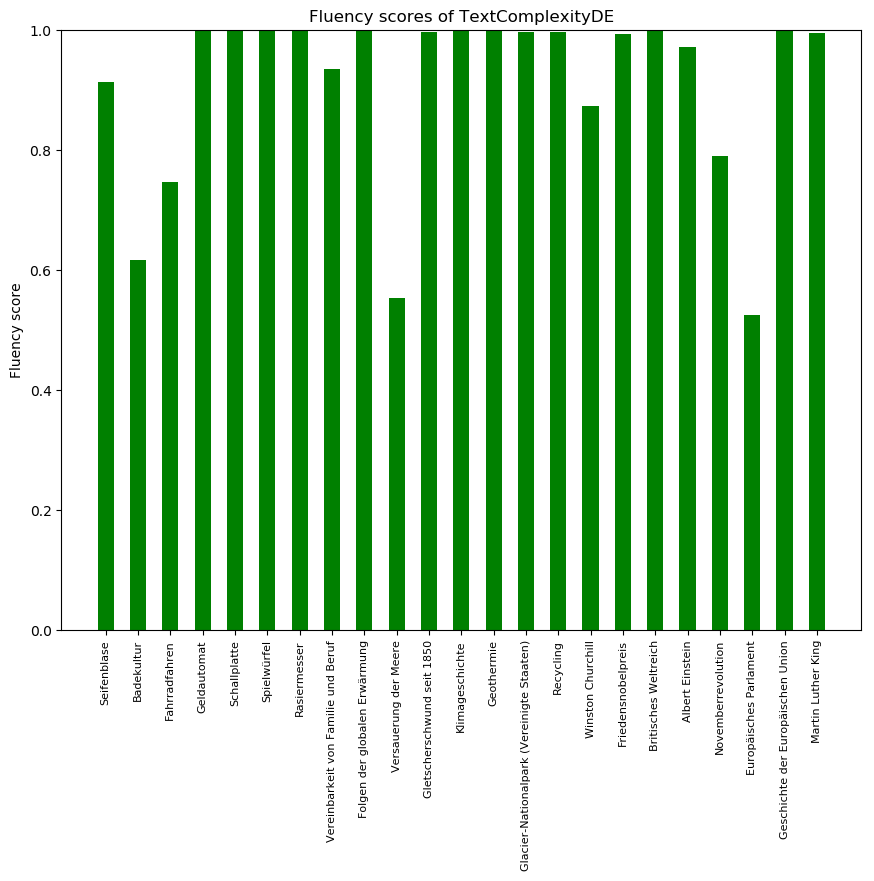

In [10]:
%matplotlib inline
fig = plt.figure(figsize=(8, 6), dpi=100)

ax = fig.add_axes([0,0,1,1])

for idx in range(len(tc_scores)):
    ax.bar(idx, tc_scores[idx], color = 'g', width = 0.5)
ax.set_ylabel('Fluency score')
ax.set_title('Fluency scores of TextComplexityDE')
ax.set_ylim([0, 1])
ax.set_xticks(range(len(tc_scores)))
ax.set_xticklabels(textcomplexity['Article'].to_list(), fontdict={'fontsize': 8})
plt.xticks(rotation=90)

plt.show()